In [9]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray, rgba2rgb
from skimage import io, data


# Exercise 1: Singular Value Decomposition of a Picture
## RGB to grayscale
This example converts an image with RGB channels into an image with a single grayscale channel.

The value of each grayscale pixel is calculated as the weighted sum of the corresponding red, green and blue pixels as:
```
Y = 0.2125 R + 0.7154 G + 0.0721 B
```
These weights are used by CRT phosphors as they better represent human perception of red, green and blue than equal weights. 1

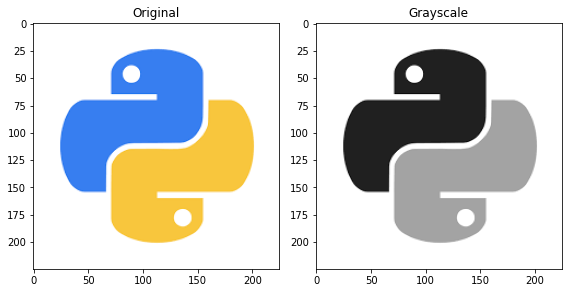

In [10]:
#original = data.astronaut()
#grayscale = rgb2gray(original)

original = io.imread('resources/python_icon.png')
grayscale = rgb2gray(rgba2rgb(original))


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

# Singular Value Decomposition
Factorizes the matrix A into two unitary matrices U and Vh, and a 1-D array s of singular values (real, non-negative) such that a == U @ diag(s) @ Vh.

Now we can take only a part of the calculated matrices to get U_r, S_r & Vh_r.
* U_r := first r-columns of U
* S_r := diagonal matrix of the first r singular values
* Vh_r := first r-rows of Vh

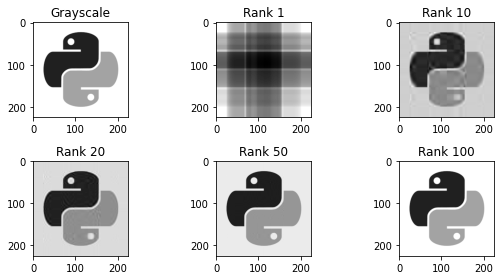

In [11]:
from scipy import linalg

A = grayscale
ranks = [1, 10, 20 ,50 ,100]

n_rows = 2
fig, axes = plt.subplots(n_rows, int((len(ranks)+1)/n_rows), figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(A, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")


for index, rank in enumerate(ranks):
    U, s, Vh = linalg.svd(grayscale)

    U_r = U[:, :rank]
    S_r = np.diag(s[:rank])
    Vh_r = Vh[:rank, :]

    A_r = U_r @ S_r @ Vh_r

    ax[index+1].imshow(A_r, cmap=plt.cm.gray)
    ax[index+1].set_title(f"Rank {rank}")


fig.tight_layout()
plt.show()


The amount of data needed to store the approximation of a matrix A of size n,m can be calculated as:

compressed size = m x r + r + r x n = r x (1 + m + n)

In [12]:
m = A.shape[0]
n = A.shape[1]

size = m*n
print(f'The uncompressed image needs to store {m} * {n} = {size} values.')

for rank in ranks:
    size_r = rank * (1 + m + n)
    print(f'r = {rank}: compressed size = {rank} * (1 + {m} + {n}) = {size_r}')
    print(f'Rate c = {size_r/size * 100:.2f}%')

The uncompressed image needs to store 225 * 225 = 50625 values.
r = 1: compressed size = 1 * (1 + 225 + 225) = 451
Compression of 0.89%
r = 10: compressed size = 10 * (1 + 225 + 225) = 4510
Compression of 8.91%
r = 20: compressed size = 20 * (1 + 225 + 225) = 9020
Compression of 17.82%
r = 50: compressed size = 50 * (1 + 225 + 225) = 22550
Compression of 44.54%
r = 100: compressed size = 100 * (1 + 225 + 225) = 45100
Compression of 89.09%
